# C3M4 Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. Differentiate between additive and multiplicative models.
2. Apply GAMs to different types of responses, including Binary and Poisson.
3. Explore how effective degrees of freedom relates to parameter linearity.
4. Evaluate the performance of GAM models.

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.

In [1]:
# Load Required Libraries
library(testthat)
library(tidyverse)
library(mgcv)  # For GAM models
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.



# Problem 1: Identifying Additive Models

GAMs are specified to be the sum of seperate functions of predictors. In math terms, that means $$Y_i = f(x_{i,1}+\dots+f_{i,p}) + \epsilon_i = f_1(x_{i,1})+\dots+f_p(x_{i,p})+\epsilon_i$$. For the following models, answer `TRUE` if the model can be expressed as a GAM and `FALSE` if it can not.

1. $f(x_1, x_2, x_3) = x_1 + x_2 + (x_1x_2)^2 + \sqrt{x_3}$
2. $f(x_1, x_2, x_3) = \dfrac{x_1x_2x_3 + x_2x_3 + x_3}{x_2x_3}$
3. $f(x_1, x_2) = \log(\sqrt{x_1x_2})$
4. $f(x_1, x_2) = \beta_0 + \exp(x_1x_2)$
5. $f(x_1) = 0$


In [2]:
# Code your answers as TRUE or FALSE.

prob.1.1 = FALSE

prob.1.2 = TRUE

prob.1.3 = TRUE

prob.1.4 = FALSE

prob.1.5 = TRUE

# your code here

#points all good


In [3]:
# Test Cell
# Make sure your answers are booleans!
# This cell has hidden test cases that will run after submission.

In [4]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [5]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [6]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [7]:
# Test Cell
# This cell has hidden test cases that will run after submission.

# Problem 2: GAMs with Binary Response

In 1911, the Titanic sailed off on its maiden voyage from Southampton, on its way towards New York City. Unfortunately, the ship would eventually collide with an iceberg and sink to the bottom of the ocean. As the ship was sinking, it is said that lifeboats (and floating doors) were prioritized for women and children, and thus many of them were able to surive until rescue arrived. Although a bit grizzy, it does pose an interesting statistical question. If we have the list of passengers, can we predict who will survive the sinking of the Titanic?

Turns out GAMs can be used for different kinds of response as well, including Binary responses. That means we can use GAMs to try to answer our question. We load in the data below. It may help to do some basic data analysis before doing too much modeling.

In [8]:
# Load in the Data
titanic = read.csv("titanic.csv", sep=",")
head(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


### 2. (a) Data Cleaning

Before we get to work, we need to clean up this data a bit. If you look over it, you will notice a fair number of columns, many missing values and some NA values. We're going to need to clean our data before we're able to do any modelling. When you're done, you will have a cleaned dataset `titanic`, your training set `titanic.train` and your test set `titanic.test`. Here's what needs to be done:

* We have a lot of predictors, but we don't need them all. Restrict the data to on the `Survived`, `Pclass`, `Sex`, `Age` and `Fare` columns.
* There's still missing data in our dataframe. That won't do. Remove any rows that have at least one missing value in any column.
* If you look at the types of each column, you'll notice that some factors have been loaded as numeric. We should change that. Set `Survived` and `Pclass` to categorical.
* We will eventually want to analyze how well our model performs. Split the data into training and test sets. Do this by putting every fifth row into the test set, and use the rest for training. For example, the first 4 rows will be in the training set, and the $5^{th}$ row will be in the test set. Repeat that pattern for the rest of the data.

In [9]:
titanic.train = NA
titanic.test = NA

# your code here
titanic = select(titanic, Survived, Pclass, Sex, Age, Fare)
titanic = na.omit(titanic)
titanic$Pclass = as.factor(titanic$Pclass)
titanic$Survived = as.factor(titanic$Survived)

index = seq(0, nrow(titanic), 5)
titanic.test <- titanic[index, ]
titanic.train <- titanic[-index, ]

nrow(titanic.train)
nrow(titanic)
titanic.train

#points all good

[1] 572

[1] 714

,Survived,Pclass,Sex,Age,Fare
,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,0,3,male,22,7.2500
2,1,1,female,38,71.2833
3,1,3,female,26,7.9250
4,1,1,female,35,53.1000
7,0,1,male,54,51.8625
8,0,3,male,2,21.0750
9,1,3,female,27,11.1333
10,1,2,female,14,30.0708
12,1,1,female,58,26.5500


In [10]:
# Test Cell
# This cell has hidden test cases that will run after submission.
if(!test_that("Checking DataFrame Size", {expect_equal(nrow(titanic), 714)
                                          expect_equal(nrow(titanic.train), 572)})){
    print("Incorrect Dataset sizes. Make sure these are correct, or else your modelling could be incorrect.")
}


### 2. (b) Fit Your GAM

Now that our dataset is clean, we can fit our model. Fit your GAM as `titanic.gam` with `Survived` as your response and all other values as predictors. Make sure to smooth the necesary predictors!

Hint: The response is binary, so you will need to tell your model to expect that. How did we do that when we were fitting GLMs?

Look at the summary for your GAM model. Where any predictors insignificant? Save the string name of any/all insignificant predictors into the list `insig.predictors`.


Family: binomial 
Link function: logit 

Formula:
Survived ~ Pclass + Sex + s(Age) + s(Fare)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.6562     0.3394   7.826 5.03e-15 ***
Pclass2      -1.4661     0.3756  -3.904 9.47e-05 ***
Pclass3      -2.4575     0.4024  -6.107 1.01e-09 ***
Sexmale      -2.4886     0.2315 -10.752  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
          edf Ref.df Chi.sq p-value   
s(Age)  3.995  4.959  19.28 0.00154 **
s(Fare) 2.024  2.524   1.26 0.52078   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.387   Deviance explained = 31.8%
UBRE = -0.043402  Scale est. = 1         n = 572

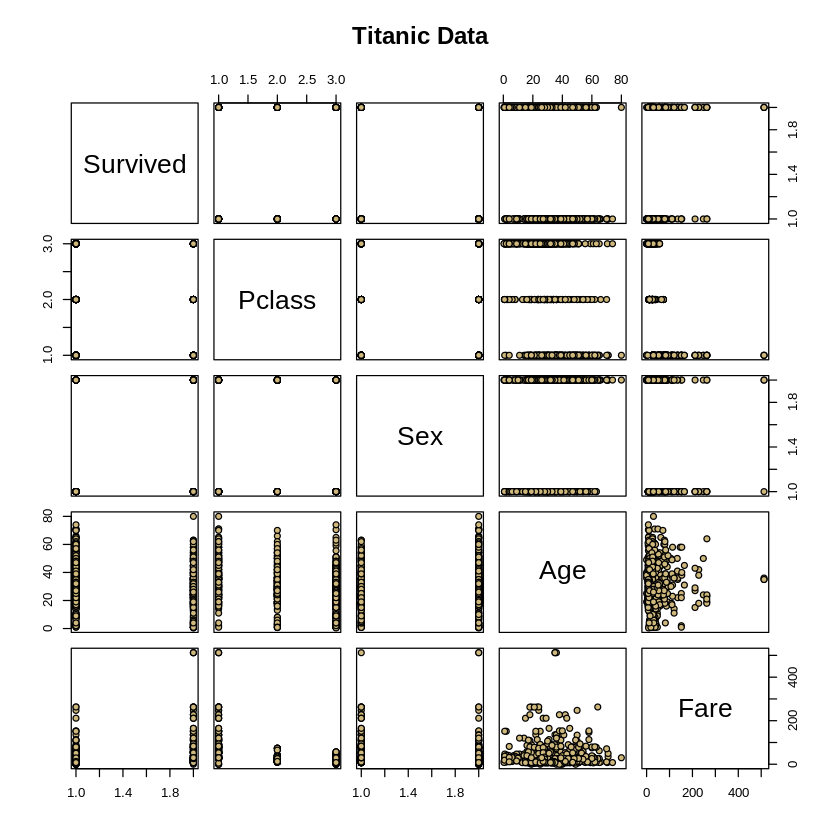

In [11]:
titanic.gam = NA
insig.predictors = c()

# your code here
pairs(titanic, main = "Titanic Data", pch = 21,
bg = c("#CFB87C"))

titanic.gam = gam(Survived ~ Pclass + Sex + s(Age) + s(Fare), data=titanic.train, family=binomial)
summary(titanic.gam)
insig.predictors = c("Fare")

In [12]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [13]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2. (c) Effective Degrees of Freedom

Let's take a look at our continuous predictors and see if they appear linearly in our GAM model. There are two ways of doing this:

* Use the `plot.gam()` function to plot the curves of your continuous predictors.
* Look at the Effective Degrees of Freedom for the continuous variables.

After conducting these analysis, determine whether each continuous predictor is linear or not. Remember, in statistical terms, a "smooth term" is linear if you can draw a line through the 95% confidence band.

Save your answer as `TRUE` if it is linear and `FALSE` if it is not. Use `age.is.linear` for `Age` and `Fare.is.linear` for `Fare`. 

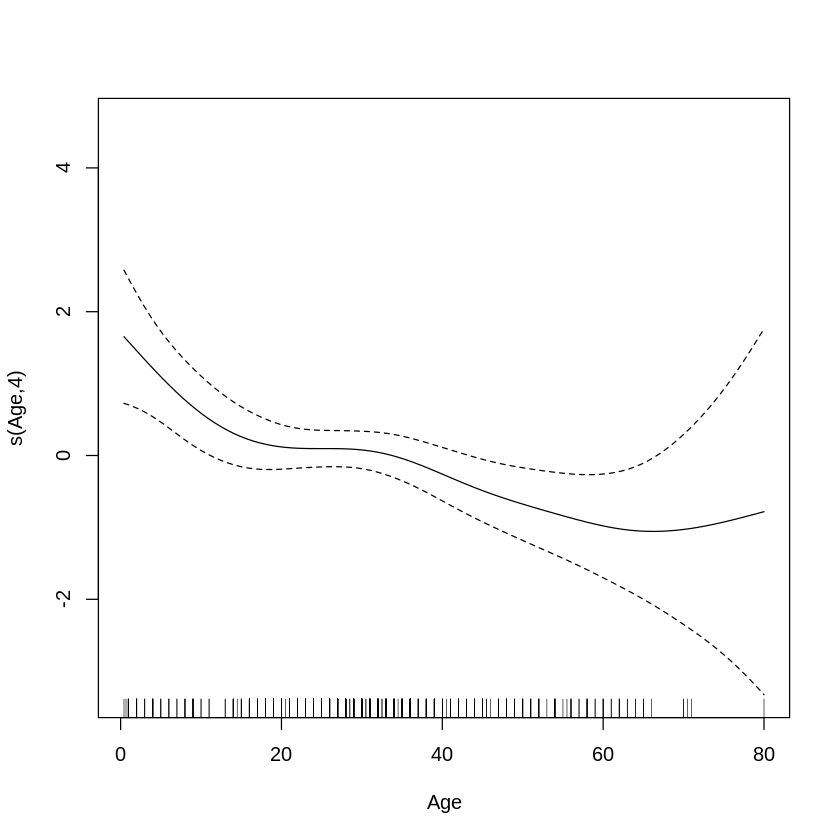


Family: binomial 
Link function: logit 

Formula:
Survived ~ Pclass + Sex + s(Age) + s(Fare)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.6562     0.3394   7.826 5.03e-15 ***
Pclass2      -1.4661     0.3756  -3.904 9.47e-05 ***
Pclass3      -2.4575     0.4024  -6.107 1.01e-09 ***
Sexmale      -2.4886     0.2315 -10.752  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
          edf Ref.df Chi.sq p-value   
s(Age)  3.995  4.959  19.28 0.00154 **
s(Fare) 2.024  2.524   1.26 0.52078   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.387   Deviance explained = 31.8%
UBRE = -0.043402  Scale est. = 1         n = 572

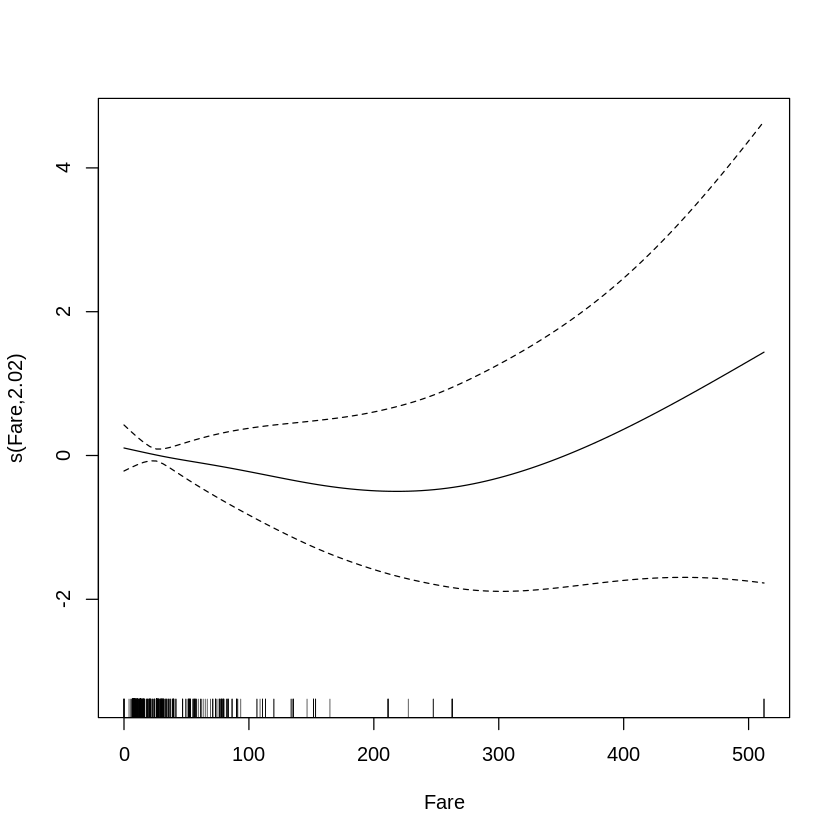

In [14]:
age.is.linear = NA
fare.is.linear = NA

# your code here
plot.gam(titanic.gam)
summary(titanic.gam)

age.is.linear = FALSE
fare.is.linear = TRUE

In [15]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [16]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2. (d) Predicting with GAMs

Let's use our Test set to determine how well our model performs on new data. Predict the `Survived` values for the data in your test set and compute the accuracy, precision, recall and F1 score. Save these values as `gam.acc`, `gam.prec`, `gam.rec` and `gam.f1`.

How well did the model do?

In [17]:
gam.acc = NA
gam.prec = NA
gam.rec = NA
gam.f1 = NA

# your code here

titanic.predict = predict.gam(titanic.gam, type = "response", titanic.test, na.rm = TRUE)
titanic.class = ifelse(titanic.predict > 0.5, 1, 0)

tp = sum(titanic.class == 1 & titanic.test$Survived == 1);
tn = sum(titanic.class == 0 & titanic.test$Survived == 0);
fp = sum(titanic.class == 1 & titanic.test$Survived == 0);
fn = sum(titanic.class == 0 & titanic.test$Survived == 1);

gam.acc = (tp+tn)/(tp+tn+fp+fn);
gam.prec = tp/(tp+fp)
gam.rec = (tp)/(tp+fn)
gam.f1 = (2*tp)/(2*tp+fp+fn)

In [18]:
# Test Cell
# This cell has hidden test cases that will run after submission.